# Exercise 6.1

Prove $P(a,b) = P_A(a)P_B(b) \implies \langle\sigmaA\sigmaB\rangle = \langle\sigmaA\rangle\langle\sigmaB\rangle$, or in other words, if the probabilities factorize, then their correlation is zero.

Bayesian:

$P(a,b) = P(a|b)P(b)$

$P(a,b) = P(a)P(b) \implies P(a|b) = P(a) \iff a \perp\!\!\!\perp b$

$\square$

Expectation Values:

$\langle\sigmaA\sigmaB\rangle = \sum_a \sum_b abP(a,b)$ 

$=\sum_a aP(a) \sum_b bP(b)$

$= \langle\sigmaA\rangle\langle\sigmaB\rangle$

$\square$

# Exercise 6.2

Show that, if each individual state is normalized, then so too is the product state.

$|product state\rangle = \{\alpha_u|u\} + \alpha_d|d\}\} \otimes \{\beta_u|u\rangle + \beta_d|d\rangle\}$

Each individual state is normalized such that:

$\alpha_u^*\alpha_u + \alpha_d^*\alpha_d = 1$

$\beta_u^*\beta_u + \beta_d^*\beta_d = 1$

So, assuming the product state maintains normalization without additional constraints:

$\alpha_u^*\alpha_u\beta_u^*\beta_u + \alpha_d^*\alpha_d\beta_d^*\beta_d + \alpha_u^*\alpha_u\beta_d^*\beta_d + \beta_u^*\beta_u\alpha_d^*\alpha_d = 1$

$\alpha_u^*\alpha_u[\beta_u^*\beta_u+\beta_d^*\beta_d] + \alpha_d^*\alpha_d[\beta_d^*\beta_d+\beta_u^*\beta_u] = \alpha_u^*\alpha_u + \alpha_d^*\alpha_d = 1$

$\square$

# Exercise 6.3

Prove that the state $|sing\rangle$ cannot be written as a product state.

$|sing\rangle = \frac{1}{\sqrt{2}}(|ud\rangle - |du\rangle)$

This is a general linear combination of the state vectors from each Alice and Bob:

$|general state\rangle = \psi_{uu}^*\psi_{uu}|uu\rangle + \psi_{ud}^*\psi_{ud}|ud\rangle + \psi_{du}^*\psi_{du}|du\rangle + \psi_{dd}^*\psi_{dd}|dd\rangle$

Subject to the normalization condition:

$\psi_{uu}^*\psi_{uu} + \psi_{ud}^*\psi_{ud} + \psi_{du}^*\psi_{du} + \psi_{dd}^*\psi_{dd} = 1$

A product state forms a combination:

$\alpha_u\beta_u|uu\rangle + \alpha_u\beta_d|ud\rangle + \alpha_d\beta_u|ud\rangle + \alpha_d\beta_d|dd\rangle$

Subject to the normalizations:

$\alpha_u^*\alpha_u + \alpha_d^*\alpha_d = 1$

$\beta_u^*\beta_u + \beta_d^*\beta_d = 1$


Assume $|sing\rangle$ is a product state.

$\implies \alpha_u\beta_d = \frac{1}{\sqrt{2}}$ and $\alpha_d\beta_u = -\frac{1}{\sqrt{2}}$ and $\alpha_u\beta_u = 0$ and $\alpha_d\beta_d = 0$

$\alpha_u\beta_u = 0 \implies \alpha_u = 0$ or $\beta_u = 0$ Which contradicts $\alpha_u\beta_d|ud\rangle = \frac{1}{\sqrt{2}}$

$\square$


# Exercise 6.4

Use the matrix forms of $\sigmaz$, $\sigmax$, and $\sigmay$, and the columns vectors, $|u\rangle$ and $|d\rangle$ to verify equations 6.6.

In [1]:
from utils import *

for m,ss in itertools.product(sigma, spin):
    result = sigma[m] @ spin[ss]
    display(Math(f'\sigma{m}|{ss}) = ' + numpy_array_to_latex(result)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Use equations 6.6 and 6.7 to write out all of the equations 6.8

In [2]:
# more matrix multiplication - using Python + Latex is fun

for m, ss1, ss2 in itertools.product(sigma, spin, spin):

    sigmastate = np.concatenate([sigma[m] @ spin[ss1], spin[ss2]], axis=1)
    display(Math(f'\sigma{m}|{ss1}{ss2}) = ' + numpy_array_to_latex(sigmastate)))

    tau_state = np.concatenate([spin[ss1], sigma[m] @ spin[ss2]], axis=1)
    display(Math(f'\\tau_{m}|{ss1}{ss2}) = ' + numpy_array_to_latex(tau_state)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercise 6.5

Prove the following theorem: when any of Alice or Bob's spin operators acts on a product state, the result is still a product state.

$|product state\rangle = [\alpha_u|u\rangle + \alpha_d|d\rangle] \otimes [\beta_u|u\rangle + \beta_d|d\rangle]$

In [3]:
'''Above I was using the basic objects I built myself on top of Numpy. Rather than build 
   an entire quantum library, I will opt instead to use the QuTip library. Very useful.'''

# constructing a product state: the .unit() implicitly normalizes the coefficients
p_state = tensor((basis(2,0) + basis(2,1)).unit(), (basis(2,0) + basis(2,1)).unit())
display(Math('p\_state = ' + numpy_array_to_latex(np.array(p_state).round(1))))

for m in sigma:

    # acting on Alice's state
    operator = tensor(Qobj(sigma[m]), qeye(2))
    result = operator * p_state
    display(Math(f'\sigma{m}|p\_state) = ' + numpy_array_to_latex(np.array(result).round(1))))

    # given that we are using tensor products, the order of operation specifies which state the operator acts upon
    # acting on Bob's state
    operator = tensor(qeye(2), Qobj(sigma[m]))
    result = operator * p_state
    display(Math(f'\\tau_{m}|p\_state) = ' + numpy_array_to_latex(np.array(result).round(1))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Indeed we can see that each vector adheres to the normalization condition.

# Exercise 6.6

Assume Charlie has prepared the two spins in the singlet state. This time, Bob measures $\tau_y$ and Alice measures $\sigmax$. What is the expectation value of $\sigmax\tau_y$?

$\langle\sigmax\tau_y\rangle = \langle sing|\sigmax\tau_y|sing\rangle $

$=\langle sing|\sigmax\tau_y|(|ud\rangle -|du\rangle)$

$=\langle sing|\sigmax|(-i|uu\rangle -i|dd\rangle)$

$=\langle sing||(-i|du\rangle -i|ud\rangle)$

$=(\langle ud| -\langle du|)(-i|du\rangle -i|ud\rangle)$

$=\frac{1}{\sqrt{2}}[-i\langle ud|du\rangle - i\langle ud|ud\rangle +i\langle du|du\rangle + i\langle du|du\rangle]$

$=\frac{-i}{\sqrt{2}}[\langle ud|du\rangle + \langle ud|ud\rangle -\langle du|du\rangle - \langle du|du\rangle]$

$=\frac{-i}{\sqrt{2}}[\langle ud|du\rangle + \langle ud|ud\rangle -\langle du|du\rangle - \langle du|du\rangle]$

$=[0+1-1-0] = 0$

What does this say about the correlation between the two measurements?

$Correlation := \langle\sigmax\tau_y\rangle - \langle\sigmax\rangle\langle\tau_y\rangle$

$=0-0\cdot0 = 0$

There is no correlation - what happens in one's system is independent of what happens in another's (in a product state).

In [4]:
# qutip has a built-in singlet state
result = expect(tensor(sigmax(), sigmay()), singlet_state())
display(Math(f'\langle\sigmax\\tau_y\\rangle = ' + str(result)))

<IPython.core.display.Math object>

# Exercise 6.7 \& 6.8

In [5]:
# reformatting the qutip functions for ease of displaying results in Latex
trip = {f'T_{i}':ts for i, ts in enumerate(triplet_states())}
ops = {'x': sigmax(),
       'y': sigmay(),
       'z': sigmaz()}

for state,op1,op2 in itertools.product(trip, ops, ops):
    result = expect(tensor(ops[op1], ops[op2]), trip[state])
    display(Math(f'\sigma{op1}\\tau_{op2}|{state}\\rangle = ' + str(round(result))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercise 6.9

Prove that $|sing\rangle$, $|T_1\rangle$, $T_2\rangle$, and $|T_3\rangle$ are all eigenvectors of $\vec{\sigma}\cdot\vec{\tau}$. What are there eigenvalues?

In [6]:
# construct sigma.tau, consisting of the tensor product of each of their components
sigma = tensor(sigmax(), sigmax()) + tensor(sigmay(), sigmay()) + tensor(sigmaz(), sigmaz())

# find their eigenstates
e_vals, e_vecs = sigma.eigenstates()

# collect each state in question
states = [singlet_state()] + [state for state in triplet_states()]

# assert that each state is in the list of eigenvectors
for state in states:
    assert np.any([np.isclose(state, e_vec) for e_vec in e_vecs])

print(e_vals)

[-3.  1.  1.  1.]


# Exercise 6.10

A system of two spins has the Hamiltonian $H = \frac{w}{2} \vec{\sigma}\cdot\vec{\tau}$

What are the possible energies of the system and what are the eigenvectors?

In [7]:
w = symbols('w')
H = Matrix(sigma)*w/2

for i, e_vec in enumerate(H.eigenvects()):
    display(Math(f'E_{i} = ' + str(e_vec[i])))
    display(Math(f'|E_{i}\\rangle = '+ latex(e_vec[2][0])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Suppose the system starts in the state $|uu\rangle$. What is the state at any later time?

In [35]:
# setting w = 1 for ease
omega = 1.0 
H = (omega / 4) * sigma

# The initial state
S_0 = tensor(basis(2,0), basis(2,0))

# Solving the time-dependent Schrödinger equation
T = np.linspace(0, 10, 1000)
result = mesolve(H, S_0, T)

# See the state at a future time
result.states[100]


Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.96885051-0.2476463j]
 [0.        +0.j       ]
 [0.        +0.j       ]
 [0.        +0.j       ]]

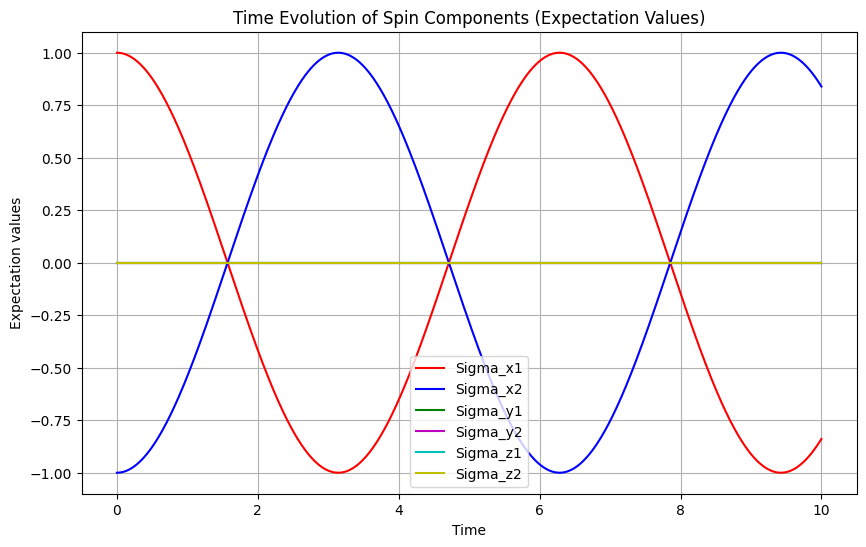

In [45]:
# Here is a more interesting example with a modified initial state of 

observables = [tensor(sigmax(), qeye(2)), tensor(qeye(2), sigmax()),
               tensor(sigmay(), qeye(2)), tensor(qeye(2), sigmay()),
               tensor(sigmaz(), qeye(2)), tensor(qeye(2), sigmaz())]

S_0 = tensor((basis(2, 0) + basis(2, 1)).unit(), (basis(2, 0) - basis(2, 1)).unit())

result = mesolve(H, S_0, T, e_ops=observables)


labels = ['Sigma_x1', 'Sigma_x2', 'Sigma_y1', 'Sigma_y2', 'Sigma_z1', 'Sigma_z2']
colors = ['r', 'b', 'g', 'm', 'c', 'y']
plt.figure(figsize=(10, 6))

for i in range(len(observables)):
    plt.plot(T, result.expect[i], label=labels[i], color=colors[i])


plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.title('Time Evolution of Spin Components (Expectation Values)')
plt.legend()
plt.grid(True)